Reference site - https://medium.com/cityai/deep-learning-for-natural-language-processing-part-i-8369895ffb98

In [2]:
import nltk
from nltk.corpus import gutenberg
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure

C:\Users\Harshal\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
#gutenberg : It's a dataset which contains about 18 books
#In order to look at the books run the following command
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [4]:
#we will be working on the following books
gberg_sents = gutenberg.sents(fileids=['bible-kjv.txt',
                              'austen-emma.txt',
                              'austen-persuasion.txt',
                              'austen-sense.txt',
                              'carroll-alice.txt'])

In [8]:
#total number of words appearing in the set of books that we loaded
print(len(gutenberg.sents(fileids=['bible-kjv.txt',
                                   'austen-emma.txt',
                                   'austen-persuasion.txt',
                                   'austen-sense.txt',
                                   'carroll-alice.txt'])))

48304


#### WORD2VEC MODEL

In [11]:
# size = 64, dimensions
# sg = 1, use Skip-Gram. If zero, it will use CBOW
# window = 10, context words (10 to the left and 10 to the right)
# min_count = 5, ignore words with frequency lower than that
# seed = 42, the answer to the universe, life and everything.
# workers = 2, number of worker threads.

model = Word2Vec(sentences=gberg_sents, size=64, sg=1,
                 window=10, min_count=5, seed=42,
                 workers=2)

In [20]:
# Shows the coordinates of the word ‘house’ in the vector space.
print(model['house'])
print('\n')
print(model.wv.most_similar('house'))
print('\n')
print(model.wv.most_similar('day'))
print('\n')
print(model.wv.most_similar('father'))
print('\n')

print(model.wv.doesnt_match('mother father daughter house'.split()))

[ 0.34296483  0.05532566 -0.21205163  0.32596546  0.00207494  0.12069008
 -0.05977003  0.07316126 -0.28591055 -0.02184292 -0.49558225  0.04679359
  0.42186084  0.2776949  -0.74914503 -0.4023161   0.02875098 -0.20496039
  0.21274114  0.11231501 -0.35959798 -0.06497741  0.18458664  0.18352991
  0.14681682 -0.06352735 -0.45754293  0.07231288  0.33555064 -0.19882931
 -0.22449888  0.1575363  -0.11164622  0.11218058 -0.12435019 -0.10511476
  0.12068345  0.00771198  0.02310884 -0.13736874  0.51314455  0.68013847
  0.320975    0.12866257  0.45659104  0.00336375  0.14776754  0.18479502
 -0.01093224  0.22522943  0.29057196 -0.209095   -0.39697525  0.51358646
  0.5071581   0.01072131 -0.25463215  0.10907908 -0.30363446  0.10133105
 -0.20583077 -0.28887978 -0.2056847   0.22097714]


[('courts', 0.6568223237991333), ('chamberlain', 0.6421010494232178), ('repair', 0.6394922733306885), ('building', 0.6199352741241455), ('lamentations', 0.6190214157104492), ('breaches', 0.6171466112136841), ('place', 

C:\Users\Harshal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\Harshal\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


#### SIMILARITY

In [19]:
print(model.wv.similarity('father', 'house')) #gives the similarity between the two words
print(model.wv.similarity('father', 'mother'))

0.41985577
0.8452033


C:\Users\Harshal\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


#### WORD VECTOR ARITHEMATIC

In [21]:
# father - man + woman = mother
print(model.wv.most_similar(positive = ['father', 'woman'],
                           negative = ['man']))

[('mother', 0.7795829772949219), ('sister', 0.7221390008926392), ('daughter', 0.715880811214447), ('husband', 0.7132024765014648), ('wife', 0.6938401460647583), ('child', 0.6685064435005188), ('younger', 0.6550260186195374), ('maid', 0.6343156099319458), ('concubine', 0.6319475173950195), ('Sarah', 0.6282892227172852)]


C:\Users\Harshal\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [22]:
#king - man + woman = queen 
print(model.wv.most_similar(positive = ['king', 'woman'],
                           negative = ['man']))

[('queen', 0.6484314203262329), ('Leah', 0.6371748447418213), ('Abram', 0.63588547706604), ('Hagar', 0.6309295892715454), ('Sarah', 0.6219012141227722), ('Laban', 0.6189050078392029), ('Bethuel', 0.6138893365859985), ('Abimelech', 0.6119816303253174), ('Rebekah', 0.6032483577728271), ('Zilpah', 0.5998505353927612)]


C:\Users\Harshal\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [24]:
tsne = TSNE(n_components=2, n_iter=250)
X = model[model.wv.vocab]
X_2d = tsne.fit_transform(X)

coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.vocab.keys()
print(coords_df.head())

C:\Users\Harshal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


          x         y  token
0  0.063529  0.074211      [
1  0.268697  0.447554    The
2  0.310485  0.508151   King
3 -0.275352 -0.766493  James
4  0.094257  0.146109      ]


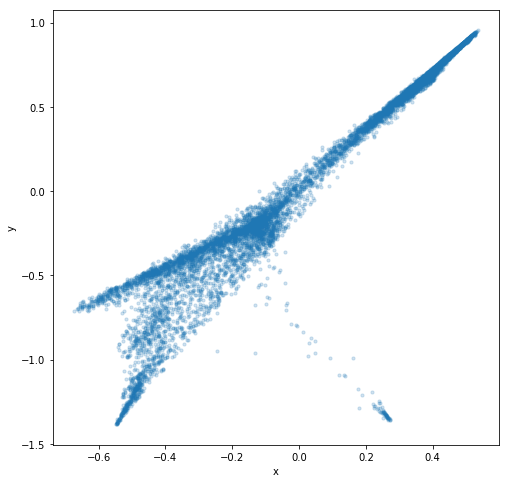

In [27]:
# Plot the graph.
import matplotlib.pyplot as plt
coords_df.plot.scatter('x', 'y', figsize=(8,8),
                       marker='o', s=10, alpha=0.2)
plt.show()

In [29]:
output_notebook()

subset_df = coords_df.sample(n=1000)
p = figure(plot_width=600, plot_height=600)
p.text(x=subset_df.x, y=subset_df.y,
       text=subset_df.token)
show(p)

Loading BokehJS ...